In [1]:
"""
Implementation of an attention-based model for item recommendation.

Cf. "Attention-Based Transactional Context Embedding for Next-Item Recommendation".
Wang et al. (2018).
"""


'\nImplementation of an attention-based model for item recommendation.\n\nCf. "Attention-Based Transactional Context Embedding for Next-Item Recommendation".\nWang et al. (2018).\n'

In [2]:
import json
from pathlib import Path
import os
import sys

sys.path.append("./../../")
print(os.getcwd())

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tqdm

from choice_learn.basket_models import TripDataset
from choice_learn.basket_models.attn_model import AttentionBasedContextEmbedding
from choice_learn.basket_models.synthetic_dataset import SyntheticDataGenerator

/home/souleiman_sbai/Artefact_souli/choice-learn/notebooks/basket_models


2025-07-24 19:07:34.952650: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753376854.964485  375307 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753376854.968224  375307 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753376854.978805  375307 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753376854.978821  375307 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753376854.978822  375307 computation_placer.cc:177] computation placer alr

In [3]:
# Parameters

n_baskets = 1500
epochs = 200
embedding_dim = 3
n_negative_samples = 7

In [4]:
# Generate synthetic dataset

data_gen = SyntheticDataGenerator()
data_gen.instantiate(
    proba_complementary_items=0.7,
    proba_neutral_items=0.3,
    noise_proba=0.15,
)
trip_dataset = data_gen.generate_trip_dataset(n_baskets)

W0000 00:00:1753376857.555468  375307 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epode:  200


Training Epochs:   0%|                                       | 0/200 [00:00<?, ?it/s]W0000 00:00:1753376859.030227  375307 loop_optimizer.cc:934] Skipping loop optimization for Merge node with control input: StatefulPartitionedCall/RaggedConcat/assert_equal_1/Assert/AssertGuard/branch_executed/_489
W0000 00:00:1753376861.318396  375307 loop_optimizer.cc:934] Skipping loop optimization for Merge node with control input: StatefulPartitionedCall/RaggedConcat/assert_equal_1/Assert/AssertGuard/branch_executed/_489
Training Epochs: 100%|█| 200/200 [05:36<00:00,  1.68s/it, epoch_loss=tf.Tensor(9156.6


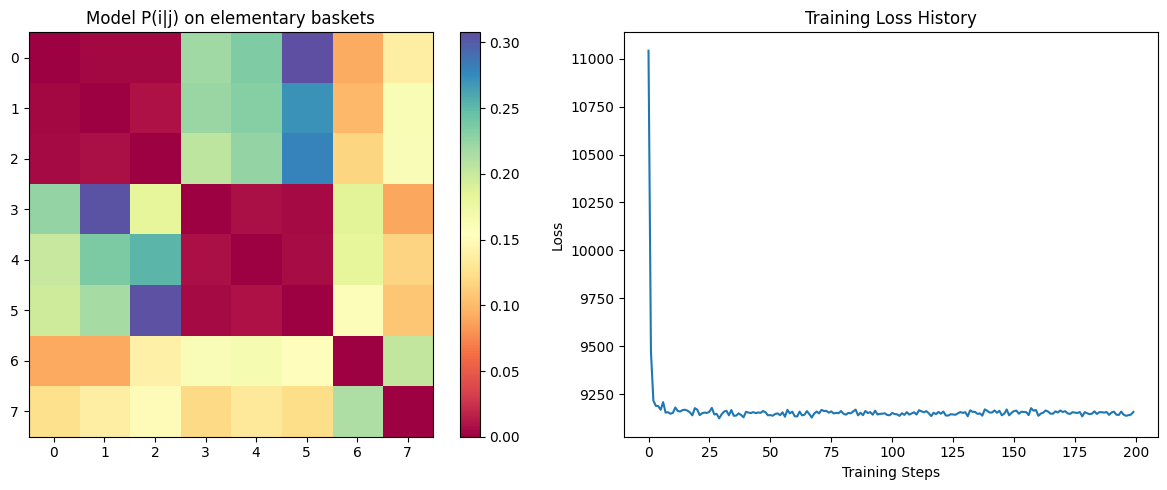

      Model Parameters
Epochs              : 200
Number of Trips     : 1500
n_negative_samples  : 7
Learning_rate       : 0.05
Loss type           : NCE Loss
Batch_size          : 50
Embedding_dim       : 3


In [5]:
# Instantiate and train the model

model1 = AttentionBasedContextEmbedding()
model1.instantiate(
    n_items=data_gen.assortment_matrix.shape[1],
    epochs=epochs,
    embedding_dim=embedding_dim,
    n_negative_samples=n_negative_samples,
)
model1.fit(trip_dataset, repr=True)

In [6]:
# Create evaluation dataset
eval_dataset = data_gen.generate_trip_dataset(100)

# Evaluate model
loss_eval_dataset_1 = model1.evaluate(eval_dataset)
print(f"Loss of model1 on the evaluation dataset {loss_eval_dataset_1}")

# Save model
model1.save_model("attn_model.json")

W0000 00:00:1753377198.769280  375307 loop_optimizer.cc:934] Skipping loop optimization for Merge node with control input: RaggedConcat/assert_equal_1/Assert/AssertGuard/branch_executed/_9


Loss of model1 on the evaluation dataset 5.985720157623291


W0000 00:00:1753377200.410424  375307 loop_optimizer.cc:934] Skipping loop optimization for Merge node with control input: RaggedConcat/assert_equal_1/Assert/AssertGuard/branch_executed/_9


In [7]:
# Create a second model without instantiating
model2 = AttentionBasedContextEmbedding()

# Load first model and compare results on evaluation dataset
model2.load_model("attn_model.json")
loss_eval_dataset_2 = model2.evaluate(eval_dataset)
print(f"Loss of model1 on the evaluation dataset {loss_eval_dataset_2}")


W0000 00:00:1753377204.359694  375307 loop_optimizer.cc:934] Skipping loop optimization for Merge node with control input: RaggedConcat/assert_equal_1/Assert/AssertGuard/branch_executed/_9
W0000 00:00:1753377205.882281  375307 loop_optimizer.cc:934] Skipping loop optimization for Merge node with control input: RaggedConcat/assert_equal_1/Assert/AssertGuard/branch_executed/_9


Loss of model1 on the evaluation dataset 6.013471603393555
